In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 25


In [3]:
data1 = 'Accra-mean.txt'
data2 = 'Accra-max.txt'
data3 = 'Accra-min.txt'

df1 = pd.read_csv(data1, names=['year', 'month', 'day', 'temperature'], sep='\s+')
df2 = pd.read_csv(data2, names=['year', 'month', 'day', 'temperature'], sep='\s+')
df3 = pd.read_csv(data3, names=['year', 'month', 'day', 'temperature'], sep='\s+')

<Figure size 2500x1000 with 0 Axes>

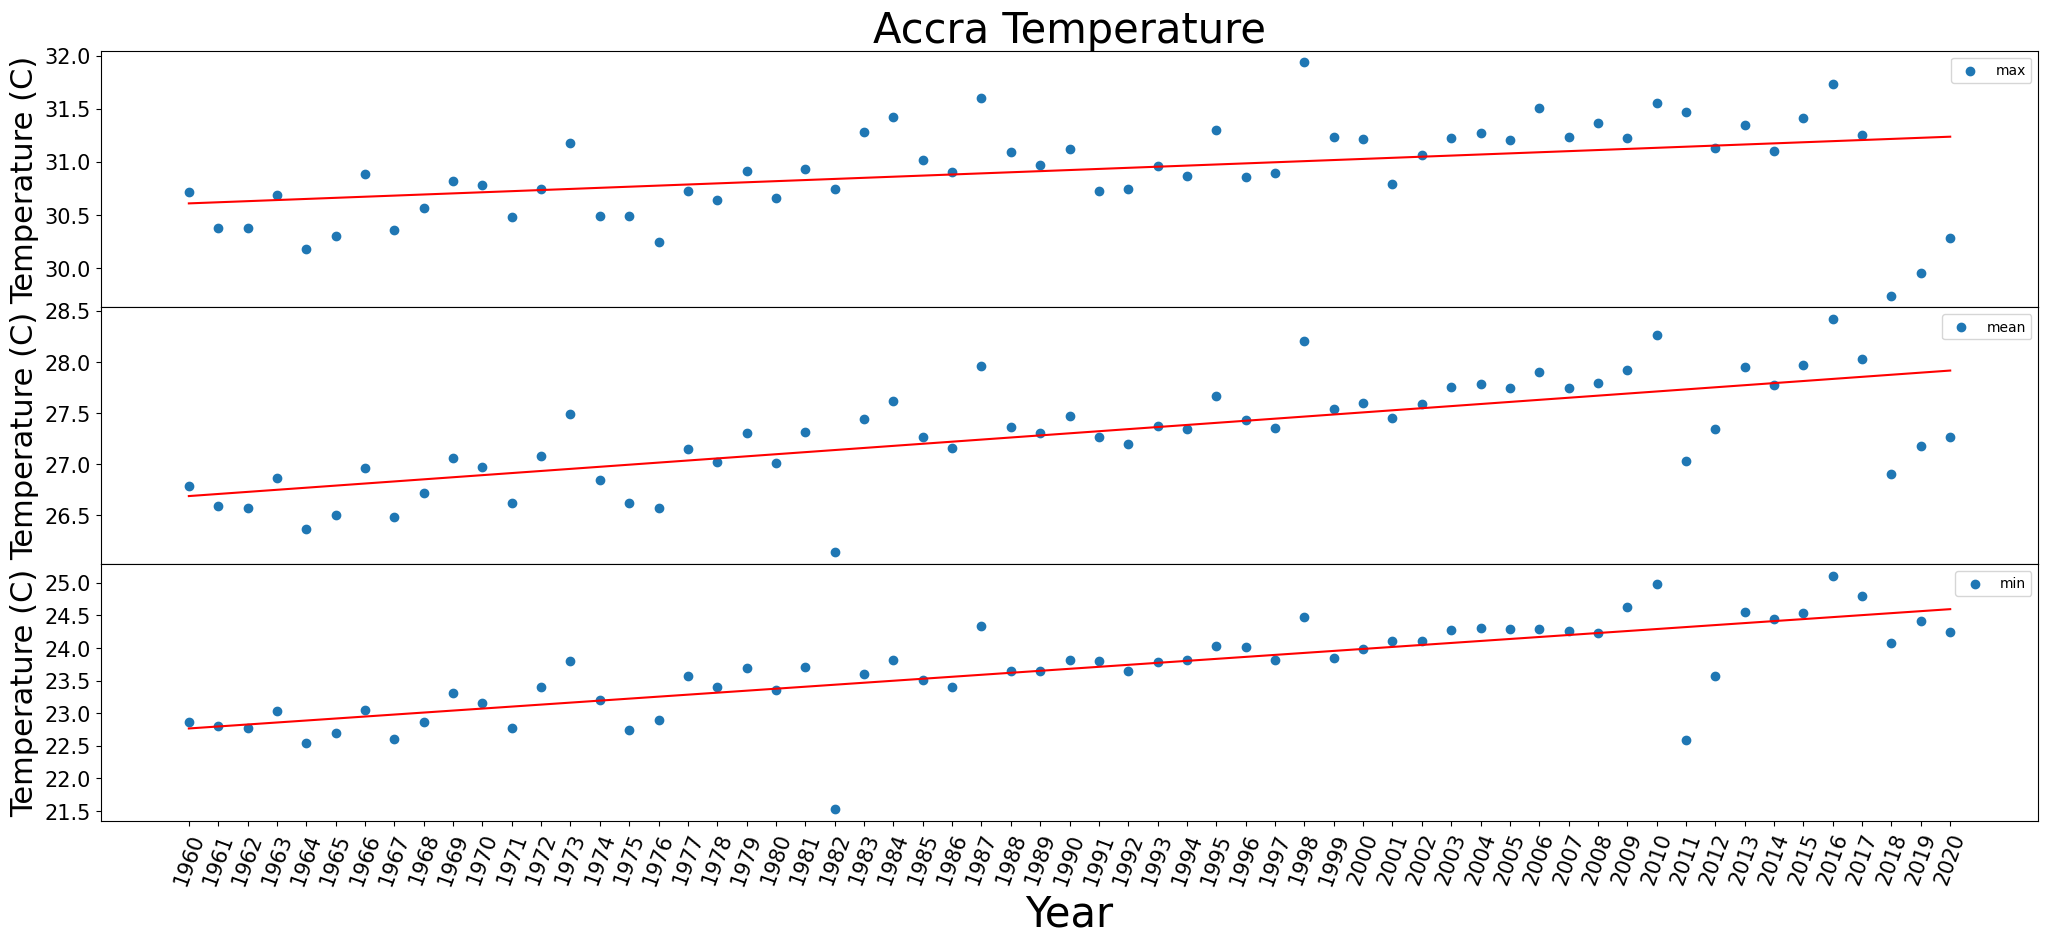

In [96]:
#calculate the yearly mean for all the 3 data sets
df1_yearly = df1.groupby('year').mean()
df2_yearly = df2.groupby('year').mean()
df3_yearly = df3.groupby('year').mean()

#plot vertically stacked scatter plots with line of best fit for each yearly mean

plt.figure(figsize=(25, 10))
#plot scatter and line of best fit for mean

fig, ax = plt.subplots(3, 1, figsize=(25, 10), sharex=True)
plt.subplots_adjust(hspace=.0)


ax[0].scatter(df2_yearly.index, df2_yearly.temperature, label='max')
ax[0].plot(np.unique(df2_yearly.index), np.poly1d(np.polyfit(df2_yearly.index,df2_yearly.temperature, 1))(np.unique(df2_yearly.index)), color='red')
ax[0].legend()
ax[0].set_ylabel('Temperature (C)', fontsize=22)
ax[0].tick_params(axis='y', labelsize=15)
#add plot title
ax[0].set_title('Accra Temperature', fontsize=30)

ax[1].scatter(df1_yearly.index, df1_yearly.temperature, label='mean')
ax[1].plot(np.unique(df1_yearly.index), np.poly1d(np.polyfit(df1_yearly.index, df1_yearly.temperature, 1))(np.unique(df1_yearly.index)), color='red')
ax[1].legend()
ax[1].set_ylabel('Temperature (C)', fontsize=22)
#set yticks size
ax[1].tick_params(axis='y', labelsize=15)


ax[2].scatter(df3_yearly.index, df3_yearly.temperature, label='min')
ax[2].plot(np.unique(df3_yearly.index), np.poly1d(np.polyfit(df3_yearly.index, df3_yearly.temperature, 1))(np.unique(df3_yearly.index)), color='red')
ax[2].legend()
#show all xticks
plt.xticks(df1_yearly.index, rotation=70, fontsize=15)
plt.xlabel('Year', fontsize=30)
plt.ylabel('Temperature (C)', fontsize=22)
plt.yticks(fontsize=15)

plt.savefig('Accra-temperature.png')
plt.show()


In [73]:
#calculate temperature anomaly index for each year
df1_temp_anomaly = (df1_yearly['temperature'] - df1_yearly['temperature'].mean()) / df1_yearly['temperature'].std()
df1_temp_anomaly = df1_temp_anomaly.to_list()

df2_temp_anomaly = (df2_yearly['temperature'] - df2_yearly['temperature'].mean()) / df2_yearly['temperature'].std()
df2_temp_anomaly = df2_temp_anomaly.to_list()

df3_temp_anomaly = (df3_yearly['temperature'] - df3_yearly['temperature'].mean()) / df3_yearly['temperature'].std()
df3_temp_anomaly = df3_temp_anomaly.to_list()

#create a new dataframe with the temperature anomaly index
temp_anomaly = pd.DataFrame({'year': df1_yearly.index, 'mean': df1_temp_anomaly, 'max': df2_temp_anomaly, 'min': df3_temp_anomaly})
temp_anomaly

,year,mean,max,min
0,1960,-1.015271,-0.479639,-1.168410
1,1961,-1.407552,-1.250620,-1.251693
2,1962,-1.439785,-1.242510,-1.303459
3,1963,-0.872863,-0.545690,-0.920707
4,1964,-1.861845,-1.698386,-1.627943
...,...,...,...,...
56,2016,2.211923,1.843756,2.043433
57,2017,1.431394,0.759989,1.594629
58,2018,-0.781364,-2.696598,0.564181
59,2019,-0.236599,-2.202773,1.042385


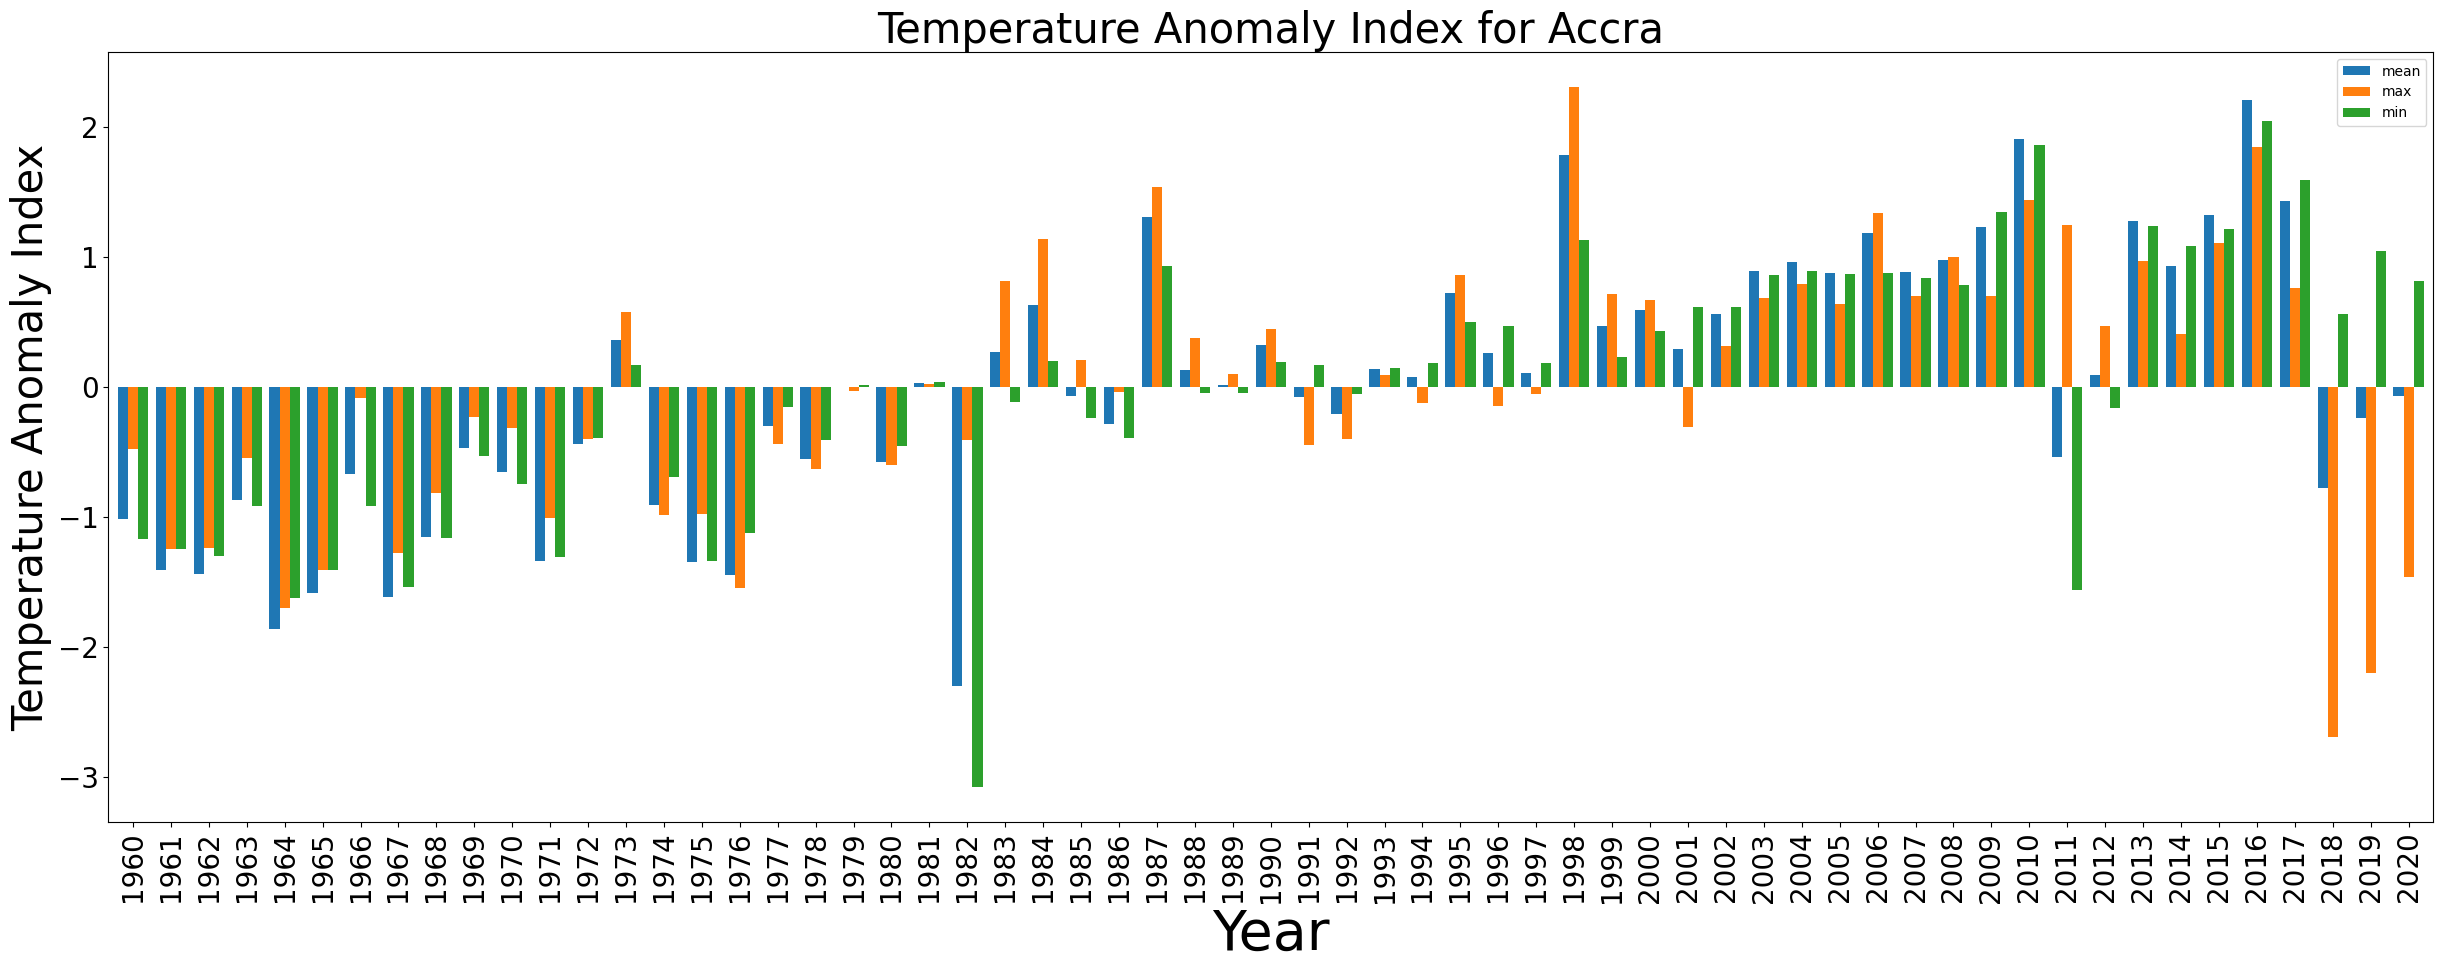

In [97]:
#plot the temperature anomaly index as a bar chart


plt.rcParams["figure.figsize"] = (30, 10)
fig, ax = plt.subplots()
(
    temp_anomaly
    .set_index('year')
    .plot.bar(ax=ax, width=0.8)
)

plt.xlabel('Year', fontsize=40)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Temperature Anomaly Index', fontsize=30)
plt.title('Temperature Anomaly Index for Accra', fontsize=30)
plt.savefig('Accra-temperature-anomaly.png')
plt.show()

In [17]:
#%pip install statsmodels

  Using cached statsmodels-0.13.2-cp39-cp39-macosx_11_0_arm64.whl (9.1 MB)
  Using cached patsy-0.5.2-py2.py3-none-any.whl (233 kB)
You should consider upgrading via the '/Users/jerrybuaba/Desktop/kitchen/air-temperature-analysis/.venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


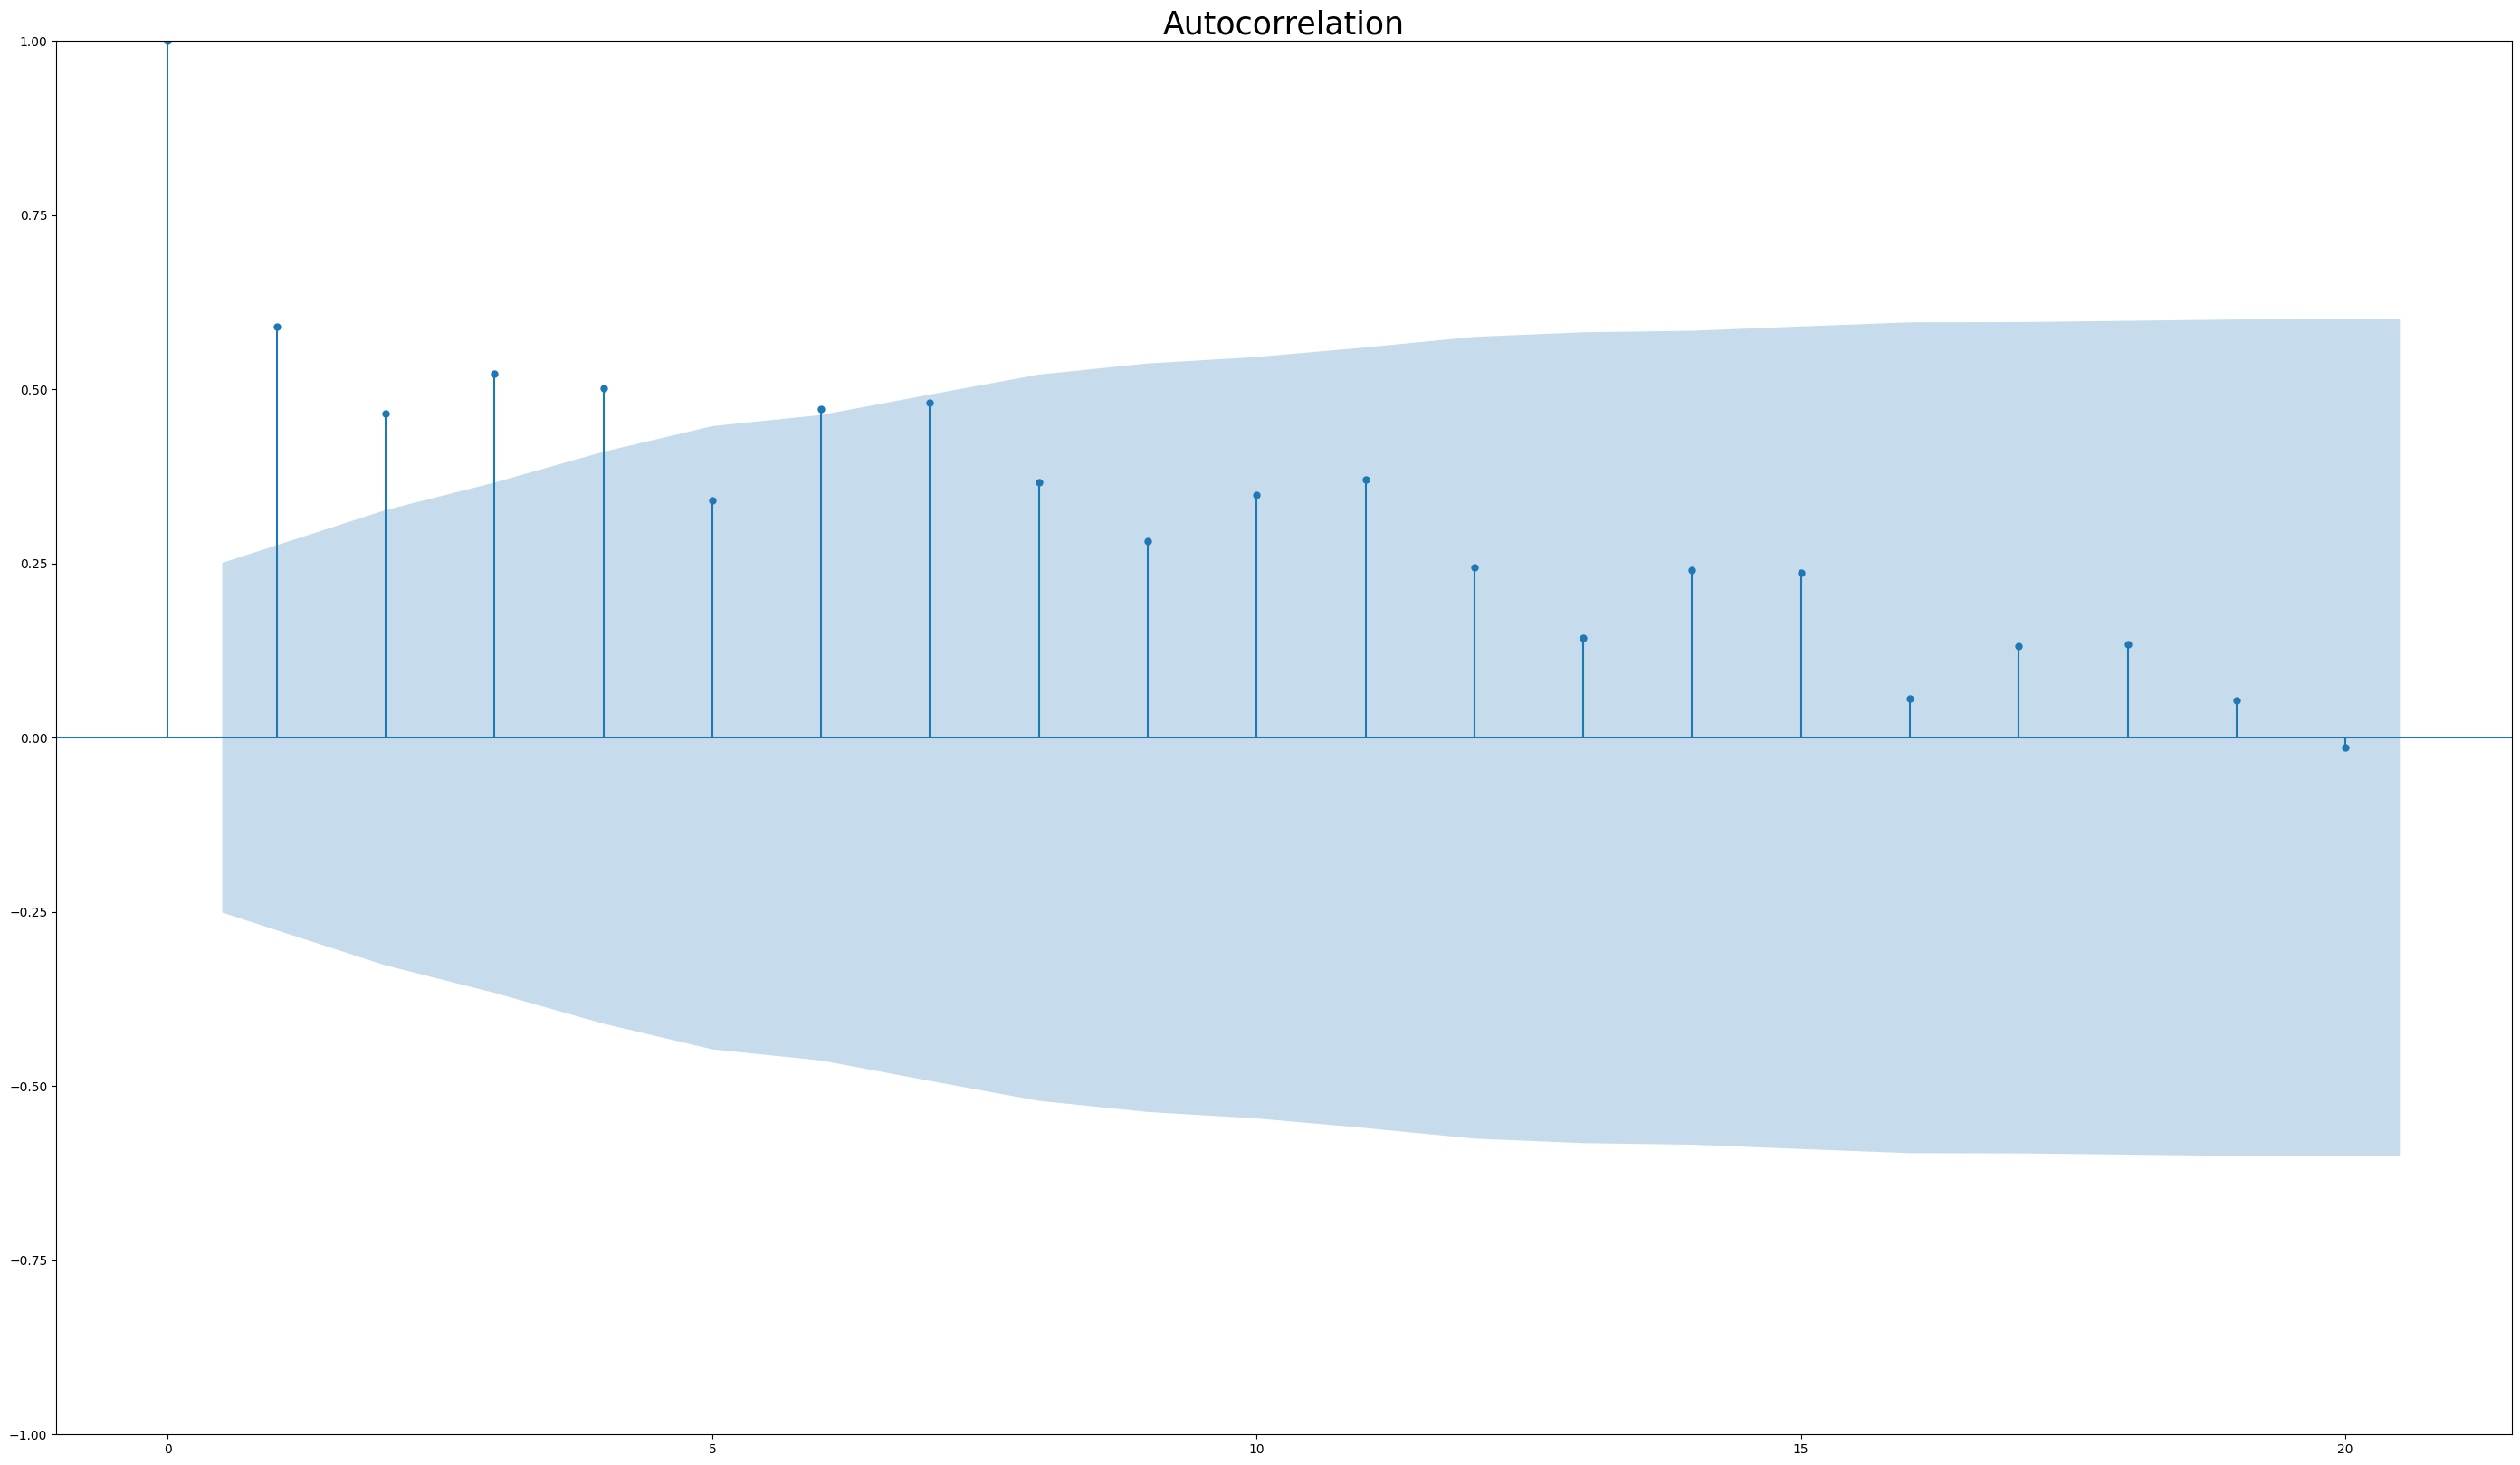

In [20]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(yearly_mean, lags=20)
plt.show()